In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from IPython.display import display, HTML
from sklearn.cluster import KMeans
import matplotlib.cm as cm

In [2]:
import os
os.chdir("..")
!pwd

/datasets/home/home-00/10/410/rcgonzal/DSC180Malware/m2v-adversarial-hindroid


In [3]:
vectors = pd.read_csv('data/out/all-apps/features.csv')
vectors = vectors.set_index('uid')
vectors

0         1         2         3         4         5         6  \
uid                                                                             
app5433  2.343784  0.868665 -1.319861  2.097967 -1.179834 -1.091537  0.273046   
app5385  1.581423  0.318168 -2.252157  2.227131 -0.046359 -1.736166 -1.864559   
app1467  0.720146  0.790188  0.110547 -0.860316 -1.593167  1.630361  0.372592   
app1335  0.276149 -0.333088 -2.251820  0.526397 -0.854043  1.428088  0.949537   
app5463 -2.098338  2.378650 -0.620158  1.378378  0.769260  2.345087  0.954617   
...           ...       ...       ...       ...       ...       ...       ...   
app1571  0.111105  0.132408 -0.260086 -0.008404 -0.010985  0.356875  0.030650   
app1801  0.298643  0.147146 -0.309600 -0.120062 -0.060548  0.267255 -0.086146   
app1810  0.181546  0.141264 -0.292017 -0.102457 -0.103409  0.306050 -0.066870   
app1817  0.114703  0.148550 -0.243507  0.000813 -0.125699  0.300438 -0.005643   
app5228  0.092324  0.126397 -0.246661  0.050765 -0.132415  0.180972  0.016282   

                7         8         9  ...       118       119       120  \
uid                                    ...                                 
app5433 -1.252044  1.471234 -0.400480  ... -0.121980  0.704963 -0.328393   
app5385 -1.016753 -0.826645 -0.594992  ...  1.141169  0.123529 -0.602702   
app1467  0.647724  0.054195 -0.956910  ...  0.749842  0.278355 -1.392985   
app1335  3.204866 -0.059420  1.013606  ... -0.651557 -0.476908 -2.475332   
app5463 -0.190110  2.914312  1.913658  ...  2.398653 -1.316855 -2.556671   
...           ...       ...       ...  ...       ...       ...       ...   
app1571  0.044481  0.174619  0.086255  ...  0.122564  0.207859 -0.031173   
app1801  0.089899  0.208934  0.150273  ...  0.105907  0.240675 -0.079913   
app1810  0.036632  0.283383  0.105664  ...  0.025078  0.209170 -0.035808   
app1817  0.047742  0.268823  0.063314  ...  0.069541  0.200469 -0.129313   
app5228  0.019865  0.220362  0.034112  ...  0.087824  0.159613 -0.140044   

              121       122       123       124       125       126       127  
uid                                                                            
app5433  0.741906 -0.636059  0.951396 -1.393672 -0.569007 -0.530167 -1.917196  
app5385  2.329150  0.576774  2.318612 -0.499520  0.542251 -1.830666 -2.045822  
app1467 -1.496067 -1.373734  0.564468  0.419560 -0.894903 -0.113457  0.257545  
app1335  3.621694 -1.824104 -0.165628 -0.179148 -2.024160 -0.160310  0.819260  
app5463  0.107897  1.465872 -0.152096  0.515517 -0.426379  2.854808  0.789225  
...           ...       ...       ...       ...       ...       ...       ...  
app1571 -0.208207 -0.159917  0.193705 -0.111334 -0.075096 -0.058469 -0.060203  
app1801 -0.178314 -0.222737  0.221994 -0.199572 -0.153552 -0.067176 -0.119831  
app1810 -0.261602 -0.165882  0.265466 -0.168268 -0.135570 -0.112530 -0.085981  
app1817 -0.260249 -0.190589  0.145132 -0.189985 -0.098561 -0.094085 -0.056720  
app5228 -0.217776 -0.158366  0.161230 -0.187823 -0.126124 -0.106376 -0.061772  

[5485 rows x 128 columns]

In [4]:
all_apps = pd.read_csv("data/out/all-apps/all_apps.csv", index_col='app')
all_apps['label'] = all_apps[all_apps.category=='malware'].app_dir.str.split('/').apply(lambda list: list[5])
other_mal_map = {key: "Other malware" for key, value in all_apps.label.value_counts().items() if value <= 200}
all_apps.label = all_apps.label.map(other_mal_map).fillna(all_apps.label)
all_apps.label.fillna(all_apps.category, inplace=True)
all_apps

app_dir  \
app                                                                                   
com.kaktus.hyungkaktus            /teams/DSC180A_FA20_A00/a04malware/random-apps...   
com.wedup.duduamzaleg             /teams/DSC180A_FA20_A00/a04malware/random-apps...   
com.dublin_mobile123.cheat_gta_5  /teams/DSC180A_FA20_A00/a04malware/random-apps...   
com.appall.optimizationbox        /teams/DSC180A_FA20_A00/a04malware/random-apps...   
live.wallpaper.t910001560         /teams/DSC180A_FA20_A00/a04malware/random-apps...   
...                                                                             ...   
com.nytimes.android               /teams/DSC180A_FA20_A00/a04malware/popular-app...   
com.tinytouchtales.alchi          /teams/DSC180A_FA20_A00/a04malware/popular-app...   
com.mycelium.wallet               /teams/DSC180A_FA20_A00/a04malware/popular-app...   
com.aceviral.smashycity           /teams/DSC180A_FA20_A00/a04malware/popular-app...   
com.wonderplanet.CrashFever       /teams/DSC180A_FA20_A00/a04malware/popular-app...   

                                      category         label  
app                                                           
com.kaktus.hyungkaktus             random-apps   random-apps  
com.wedup.duduamzaleg              random-apps   random-apps  
com.dublin_mobile123.cheat_gta_5   random-apps   random-apps  
com.appall.optimizationbox         random-apps   random-apps  
live.wallpaper.t910001560          random-apps   random-apps  
...                                        ...           ...  
com.nytimes.android               popular-apps  popular-apps  
com.tinytouchtales.alchi          popular-apps  popular-apps  
com.mycelium.wallet               popular-apps  popular-apps  
com.aceviral.smashycity           popular-apps  popular-apps  
com.wonderplanet.CrashFever       popular-apps  popular-apps  

[5487 rows x 3 columns]

In [5]:
all_apps.label.value_counts()

FakeInst         2168
Other malware    1233
BankBot           648
Youmi             568
popular-apps      324
Lotoor            314
random-apps       232
Name: label, dtype: int64

In [6]:
nodes_labeled = vectors.assign(
    app_name=pd.read_csv(
        'data/out/all-apps/app_map.csv', 
        index_col='uid'
    ).app
)
nodes_labeled['category'] = nodes_labeled.app_name.map(
    all_apps.category
)
nodes_labeled['label'] = nodes_labeled.app_name.map(
    all_apps.label
)
labels = nodes_labeled.label


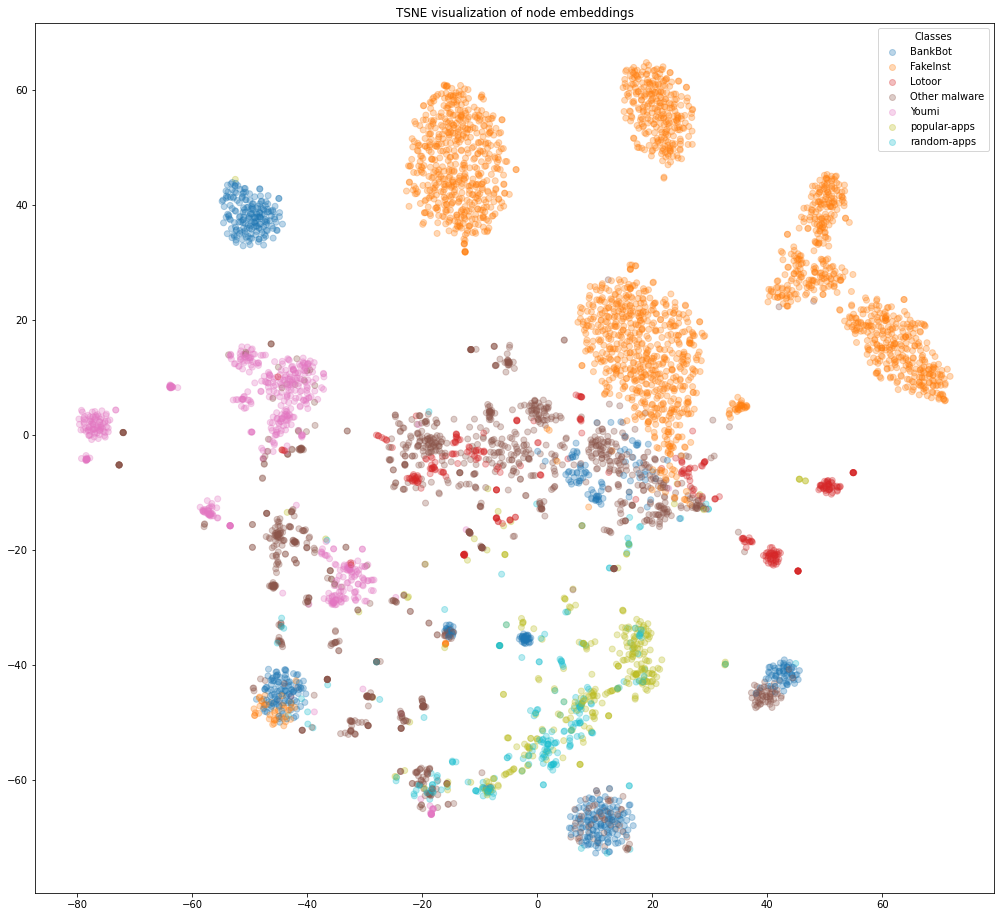

In [7]:
# Retrieve node embeddings and corresponding subjects
node_ids = list(vectors.index)  # list of node IDs
node_embeddings = (
    vectors.values
)  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = labels

transform = TSNE  # PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(node_embeddings)

# draw the points
label_map = {l: i for i, l in enumerate(np.unique(node_targets))}
node_colours = [label_map[target] for target in node_targets]

plt.figure(figsize=(20, 16))
plt.axes().set(aspect="equal")
scatter = plt.scatter(node_embeddings_2d[:, 0], 
                      node_embeddings_2d[:, 1], 
                      c=node_colours,
                      cmap='tab10',
                      alpha=0.3)
plt.title("{} visualization of node embeddings".format(transform.__name__))
legend1 = plt.legend(scatter.legend_elements()[0], label_map.keys(),
                    loc="upper right", title="Classes")
plt.savefig('data/out/all-apps/2D-plot.png')
plt.show()

In [8]:
all_apps_with_features = pd.read_csv('data/out/all-apps/all_apps_with_features.csv', index_col='app_name').drop(columns='uid')
all_apps_with_features

0         1         2         3  \
app_name                                                                       
com.whatsapp                          2.343784  0.868665 -1.319861  2.097967   
com.instagram.android                 1.581423  0.318168 -2.252157  2.227131   
d5a3f90a54a880ceb58143d6f2b2762c      0.720146  0.790188  0.110547 -0.860316   
79f2ec8676810e64db312421af39ebfc      0.276149 -0.333088 -2.251820  0.526397   
com.google.android.inputmethod.latin -2.098338  2.378650 -0.620158  1.378378   
...                                        ...       ...       ...       ...   
1edecf2b3dc5a702cd5052065a352d38      0.111105  0.132408 -0.260086 -0.008404   
936687fb892c0e86486de15080d9b4e6      0.298643  0.147146 -0.309600 -0.120062   
6a4d0bcdf41f3c87f9c671a792b711a7      0.181546  0.141264 -0.292017 -0.102457   
9e31d8f74c9d166edc8adf9d27e0729c      0.114703  0.148550 -0.243507  0.000813   
com.adobe.creativeapps.sketch         0.092324  0.126397 -0.246661  0.050765   

                                             4         5         6         7  \
app_name                                                                       
com.whatsapp                         -1.179834 -1.091537  0.273046 -1.252044   
com.instagram.android                -0.046359 -1.736166 -1.864559 -1.016753   
d5a3f90a54a880ceb58143d6f2b2762c     -1.593167  1.630361  0.372592  0.647724   
79f2ec8676810e64db312421af39ebfc     -0.854043  1.428088  0.949537  3.204866   
com.google.android.inputmethod.latin  0.769260  2.345087  0.954617 -0.190110   
...                                        ...       ...       ...       ...   
1edecf2b3dc5a702cd5052065a352d38     -0.010985  0.356875  0.030650  0.044481   
936687fb892c0e86486de15080d9b4e6     -0.060548  0.267255 -0.086146  0.089899   
6a4d0bcdf41f3c87f9c671a792b711a7     -0.103409  0.306050 -0.066870  0.036632   
9e31d8f74c9d166edc8adf9d27e0729c     -0.125699  0.300438 -0.005643  0.047742   
com.adobe.creativeapps.sketch        -0.132415  0.180972  0.016282  0.019865   

                                             8         9  ...       120  \
app_name                                                  ...             
com.whatsapp                          1.471234 -0.400480  ... -0.328393   
com.instagram.android                -0.826645 -0.594992  ... -0.602702   
d5a3f90a54a880ceb58143d6f2b2762c      0.054195 -0.956910  ... -1.392985   
79f2ec8676810e64db312421af39ebfc     -0.059420  1.013606  ... -2.475332   
com.google.android.inputmethod.latin  2.914312  1.913658  ... -2.556671   
...                                        ...       ...  ...       ...   
1edecf2b3dc5a702cd5052065a352d38      0.174619  0.086255  ... -0.031173   
936687fb892c0e86486de15080d9b4e6      0.208934  0.150273  ... -0.079913   
6a4d0bcdf41f3c87f9c671a792b711a7      0.283383  0.105664  ... -0.035808   
9e31d8f74c9d166edc8adf9d27e0729c      0.268823  0.063314  ... -0.129313   
com.adobe.creativeapps.sketch         0.220362  0.034112  ... -0.140044   

                                           121       122       123       124  \
app_name                                                                       
com.whatsapp                          0.741906 -0.636059  0.951396 -1.393672   
com.instagram.android                 2.329150  0.576774  2.318612 -0.499520   
d5a3f90a54a880ceb58143d6f2b2762c     -1.496067 -1.373734  0.564468  0.419560   
79f2ec8676810e64db312421af39ebfc      3.621694 -1.824104 -0.165628 -0.179148   
com.google.android.inputmethod.latin  0.107897  1.465872 -0.152096  0.515517   
...                                        ...       ...       ...       ...   
1edecf2b3dc5a702cd5052065a352d38     -0.208207 -0.159917  0.193705 -0.111334   
936687fb892c0e86486de15080d9b4e6     -0.178314 -0.222737  0.221994 -0.199572   
6a4d0bcdf41f3c87f9c671a792b711a7     -0.261602 -0.165882  0.265466 -0.168268   
9e31d8f74c9d166edc8adf9d27e0729c     -0.260249 -0.190589  0.145132 -0.189985   
com.adobe.creativeapps.sket

In [9]:
trans3d = transform(n_components=3)
node_embeddings_3d = trans3d.fit_transform(all_apps_with_features.drop(columns=['category', 'type']))

In [10]:
data_3d = pd.DataFrame(node_embeddings_3d, index=all_apps_with_features.index)
data_3d['malware'] = all_apps_with_features['category']=='malware'
data_3d['type'] = all_apps_with_features['type']
data_3d

0          1          2  \
app_name                                                                
com.whatsapp                           1.206300  -3.954322  18.576920   
com.instagram.android                  1.297186  -3.245454  17.633429   
d5a3f90a54a880ceb58143d6f2b2762c       6.205534  -5.786238  21.303741   
79f2ec8676810e64db312421af39ebfc     -10.524313 -17.859997   0.098755   
com.google.android.inputmethod.latin   8.123488 -15.982927  -4.393954   
...                                         ...        ...        ...   
1edecf2b3dc5a702cd5052065a352d38      -1.557961   4.901319  13.891299   
936687fb892c0e86486de15080d9b4e6      -2.100117   6.135183  12.871767   
6a4d0bcdf41f3c87f9c671a792b711a7      -0.866223   5.353446  13.474818   
9e31d8f74c9d166edc8adf9d27e0729c      -1.096564   4.863896  13.610235   
com.adobe.creativeapps.sketch         -1.148555   4.627499  13.607118   

                                      malware           type  
app_name                                                      
com.whatsapp                            False   popular-apps  
com.instagram.android                   False   popular-apps  
d5a3f90a54a880ceb58143d6f2b2762c         True         Lotoor  
79f2ec8676810e64db312421af39ebfc         True  Other malware  
com.google.android.inputmethod.latin    False   popular-apps  
...                                       ...            ...  
1edecf2b3dc5a702cd5052065a352d38         True         Lotoor  
936687fb892c0e86486de15080d9b4e6         True  Other malware  
6a4d0bcdf41f3c87f9c671a792b711a7         True  Other malware  
9e31d8f74c9d166edc8adf9d27e0729c         True  Other malware  
com.adobe.creativeapps.sketch           False   popular-apps  

[5485 rows x 5 columns]

In [48]:
data_3d[['malware', 'type']].drop_duplicates().type.map(label_map)

app_name
com.whatsapp                             5
d5a3f90a54a880ceb58143d6f2b2762c         2
79f2ec8676810e64db312421af39ebfc         3
com.nandarjoss.resepjajanandancemilan    6
e8b75b40e7eec2791f09abb1eb87deb5         4
94cd9e49e64d7ffdc2b64667157d93fa         1
c1d0adda208d6dc69c0604b233f5840a         0
Name: type, dtype: int64

In [51]:
type_chart = data_3d[['malware', 'type']].drop_duplicates()
type_chart['num'] = type_chart.type.map(label_map)
type_chart.sort_values('num')

malware           type  num
app_name                                                          
c1d0adda208d6dc69c0604b233f5840a          True        BankBot    0
94cd9e49e64d7ffdc2b64667157d93fa          True       FakeInst    1
d5a3f90a54a880ceb58143d6f2b2762c          True         Lotoor    2
79f2ec8676810e64db312421af39ebfc          True  Other malware    3
e8b75b40e7eec2791f09abb1eb87deb5          True          Youmi    4
com.whatsapp                             False   popular-apps    5
com.nandarjoss.resepjajanandancemilan    False    random-apps    6

In [55]:
label_map

{'BankBot': 0,
 'FakeInst': 1,
 'Lotoor': 2,
 'Other malware': 3,
 'Youmi': 4,
 'popular-apps': 5,
 'random-apps': 6}

In [58]:
cm.tab10(1)

(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)

In [ ]:
trace  = go.Scatter3d(
    name=name,
    x=df[0],
    y=df[1],
    z=df[2],
    mode='markers',
    marker={
        'size': 1.3,
        'opacity': 0.7,
        'color': color,
        'symbol': symbol
    }
)

In [97]:
# Import dependencies
import plotly
import plotly.graph_objs as go

type_chart = data_3d[['malware', 'type']].drop_duplicates()
type_chart['num'] = type_chart.type.map(label_map)

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    legend=dict(y=0.5, itemsizing='constant')
)

fig = go.Figure(layout=layout)

for index, row in type_chart.sort_values('num', ascending=False).iterrows():
#     print(type(row))
#     print(type(row['malware']))
#     print(type(row['type']))
    
    if row['malware']:
        symbol = 'circle'
        name = f"Malware, {row['type']}"
        size = 2
    else:
        symbol = 'x'
        name = f"Non-malware, {row['type']}"
        size = 1.3
        
    if row['type']=='Other malware':
        name=row['type']
    
    df = data_3d[data_3d.type==row['type']]
    
    rbg = tuple([255*val for val in cm.tab10(row['num'])[:3]])
    color = f"rgb{rbg}"
    print(color)
    
    trace  = go.Scatter3d(
        name=name,
        x=df[0],
        y=df[1],
        z=df[2],
        customdata=list(df.index),
        hovertemplate=
        "<b>%{customdata}</b><br>" +
        f"{name}" +
        "<extra></extra>",
        mode='markers',
#         marker_line_color='black',
#         marker_line_width=0.01,
        marker={
            'size': size,
            'opacity': 1,
            'color': color,
            'symbol': symbol
        }
    )
    
    fig.add_trace(trace)
    
# Render the plot.
plotly.offline.iplot(fig)

rgb(227.0, 119.0, 194.0)
rgb(140.0, 86.0, 75.0)
rgb(148.0, 103.0, 189.0)
rgb(214.0, 39.0, 40.0)
rgb(44.0, 160.0, 44.0)
rgb(255.0, 127.0, 14.0)
rgb(31.0, 119.0, 180.0)


In [96]:
# Import dependencies
import plotly
import plotly.graph_objs as go

# map point types to unique number
label_map = {l: i for i, l in enumerate(np.unique(data_3d.type))}
node_colours = [label_map[target] for target in data_3d.type]

# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()

# Configure the trace.
fig  = go.Scatter3d(
    x=data_3d[0],
    y=data_3d[1],
    z=data_3d[2],
    mode='markers',
    marker={
        'size': 1.3,
        'opacity': 0.7,
        'color': cm.tab10(3)[:3]#[f'rgb{cm.tab10(cls)[:3]}' for cls in node_colours]
    }
)
 

# Configure the layout.
layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)

data = [fig]

plot_figure = go.Figure(data=data, layout=layout)

# Render the plot.
plotly.offline.iplot(plot_figure)